**Бизнес-постановка задачи**
В отелях часто бронирют номера, не заселяясь в итоге. В результате этого компания недополучает прибыль. У нас есть выборка данных по бронированию отеля с результатами бронирования - заселился клиент или отменил бронь.
 Мы предлагаем построить модель, которая будет прогнозировать возможность отмены бронирования, а также позволит выявить причины этого.

Такая модель позволит одновременно улучшить прибыль компании, а также покажет, на какие категории клиентов необходимо ориентироваться, а каким категориям - разработать дополнительные условия.

**Постановка задачи анализа данных**

Целью данной задачи является построение модели классификации клиентов: на вход модель будет принимать данные о бронировании и о клиенте, а на выходе она должна работать в двух режимах:

 - выдавать вероятность отмены бронирования для данного клиента,
 - выдавать правильный с точки зрения модели класс клиента (отменит бронь или
заселится).

**Обзор доступных данных**

В выборке 119390 исторических наблюдений и 36 переменных, одна из которых - целевая. Таким образом, про каждого из 119390 клиентов мы знаем значения 36 их характеристик, в том числе значение целевой переменной: отменил клиент бронь или нет.

**Доступные признаки**

Данные содержат два типа переменных:

Целевая: is canceled, заселился клиент или отменил бронь. Остальные переменные: 35 переменных, могут использоваться для прогноза целевой переменной.
Выборка содержит следующие признаки:
1. hotel - наименование отеля
2. is_canceled - отменен
3. lead_time - время выполнения заказа
4. arrival_date_year - год прибытия
5. arrival_date_month - месяц прибытия
6. arrival_date_week_number - номер недели прибытия
7. arrival_date_day_of_month - день месяца прибытия
8. stays_in_weekend_nights - остается  в выходные ночи
9. stays_in_week_nights - остается  в будние ночи
10. adults - взрослые
11. children - дети
12. babies младенцы
13. meal - тип питания
14. country -страна
15. market_segment - сегмент рынка
16. distribution_channel - канал распределения
17. is_repeated_guest - постоянный гость
18. previous_cancellations -предыдущие отмены
19. previous_bookings_not_canceled - предыдущие бронирования не отменены
20. reserved_room_type - зарезерированный тип номера
21. assigned_room_type - присвоенный тип номера
22. booking_changes - бронирование замены
23. deposit_type - тип депозита
24. agent - агент
25. company - компания
26. days_in_waiting_list - дней в листе ожидания
27. customer_type - тип клиента
28. adr - средняя цена одной ночи
29. required_car_parking_spaces - необходимое количество парковочных мест
30. total_of_special_requests - общее количество специальных запросов
31. reservation_status - статус бронирования
32. reservation_status_date - дата бронирования
33. name - имя
34. email - электронная почта
35. phone-number - телефонный номер
36. credit_card - номер карты

In [ ]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

Библиотека scikit-learn -- де факто наиболее популярный, разносторонний, хорошо документированный и постоянно обогащающийся инструмент для построения моделей машинного обучения.

Выберем из него несколько готовых функции для расчёта метрик качества классификации.


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score # метрики качества

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# применим функцию read_csv() и посмотрим на первые 10 записей файла hotels.csv
# данные запишем в переменную 
hotel = pd.read_csv('hotel_booking.csv')
hotel.sample(10, random_state=123)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
79204,City Hotel,0,3,2015,October,43,19,1,3,1,...,Transient,134.25,0,0,Check-Out,2015-10-23,Pamela Lee,Pamela.Lee@protonmail.com,938-817-9707,************5491
73022,City Hotel,1,115,2017,August,32,12,2,2,2,...,Transient,155.00,0,2,Canceled,2017-05-15,Francisco Diaz,Francisco.D@gmail.com,871-472-6405,************9680
44658,City Hotel,0,80,2015,October,41,9,0,2,1,...,Transient-Party,108.00,0,0,Check-Out,2015-10-11,Anna Green,Green_Anna@verizon.com,585-936-6444,************8965
19217,Resort Hotel,1,92,2016,February,9,26,1,2,2,...,Transient,79.00,0,0,Canceled,2015-12-10,Christopher Thomas,Thomas.Christopher@protonmail.com,181-334-2113,************7402
45223,City Hotel,1,50,2015,October,43,24,1,1,2,...,Transient,75.00,0,0,Canceled,2015-10-07,Daniel Young,Daniel.Young25@protonmail.com,875-968-3450,************5405
25614,Resort Hotel,0,39,2016,June,27,30,1,3,2,...,Transient,154.25,0,1,Check-Out,2016-07-04,Adam Mcbride,Adam_Mcbride@protonmail.com,736-853-7720,************7609
44554,City Hotel,0,92,2015,October,41,7,0,4,1,...,Transient-Party,65.00,0,0,Check-Out,2015-10-11,Lisa Kennedy,LKennedy@comcast.net,567-561-8125,************2826
95429,City Hotel,0,38,2016,August,34,16,0,3,3,...,Transient,235.95,0,1,Check-Out,2016-08-19,David Yang,DavidYang36@comcast.net,294-718-4171,************4601
50709,City Hotel,0,136,2016,May,19,6,0,2,2,...,Transient,105.30,0,1,Check-Out,2016-05-08,Kimberly Kaufman,Kaufman.Kimberly@protonmail.com,764-268-6096,************4121
75147,City Hotel,1,278,2015,July,30,22,0,2,2,...,Transient-Party,62.00,0,0,Canceled,2015-07-02,Erica Mccall,Erica_M@aol.com,386-653-1958,************4053


In [ ]:
# посмотрим на составляющие датасета
hotel.keys()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
hotel.shape #посмотрим на размерность датасета - 36 колонок и 119390 записей 

(119390, 36)

Начнем с проверки общей информации о данных. Для того чтобы это сделать, нужно обратиться вызвать у переменной training_data метод info().


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Пропусков в данных не так много: только у столбцов children, agent, country и company.
В данных присутствует три типа dtypes:

 - int64 - целое число (16 столбцов)
 - float64 - дробное число (4 столбца)
 - object - не число, обычно текст (16 столбцов)

In [ ]:
hotel.nunique() #посмотрим количеколичество уникальных значений

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                333
company         

In [ ]:
baby = 'babies' #посмотрим какие значения содержит столбец 'babies'
childrenvalues = hotel[baby]
childrenvalues.value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

Так как бОльшая часть данных соответствует значению "0", то смысла рассматривать данную переменную нет.

In [ ]:
# проверим, совпадают ли столбцы по значению is_canceled, reservation_status и deposit_type
hotel_df = pd.DataFrame(hotel, columns = ['is_canceled', 'reservation_status', 'deposit_type'])
# посмотрим на первые пять наблюдений
hotel_df.sample(10, random_state=123)

,is_canceled,reservation_status,deposit_type
79204,0,Check-Out,No Deposit
73022,1,Canceled,No Deposit
44658,0,Check-Out,No Deposit
19217,1,Canceled,Non Refund
45223,1,Canceled,Non Refund
25614,0,Check-Out,No Deposit
44554,0,Check-Out,No Deposit
95429,0,Check-Out,No Deposit
50709,0,Check-Out,No Deposit
75147,1,Canceled,Non Refund


Cтолбцы совпадают, разница лишь в типах данных - значению Check-Out соответствует 0, Canceled - 1.
Non refund всегда соответствует Canceled и 1.

Text(0.5, 1.0, 'Зависимость месяца заселения и отмены бронирования')

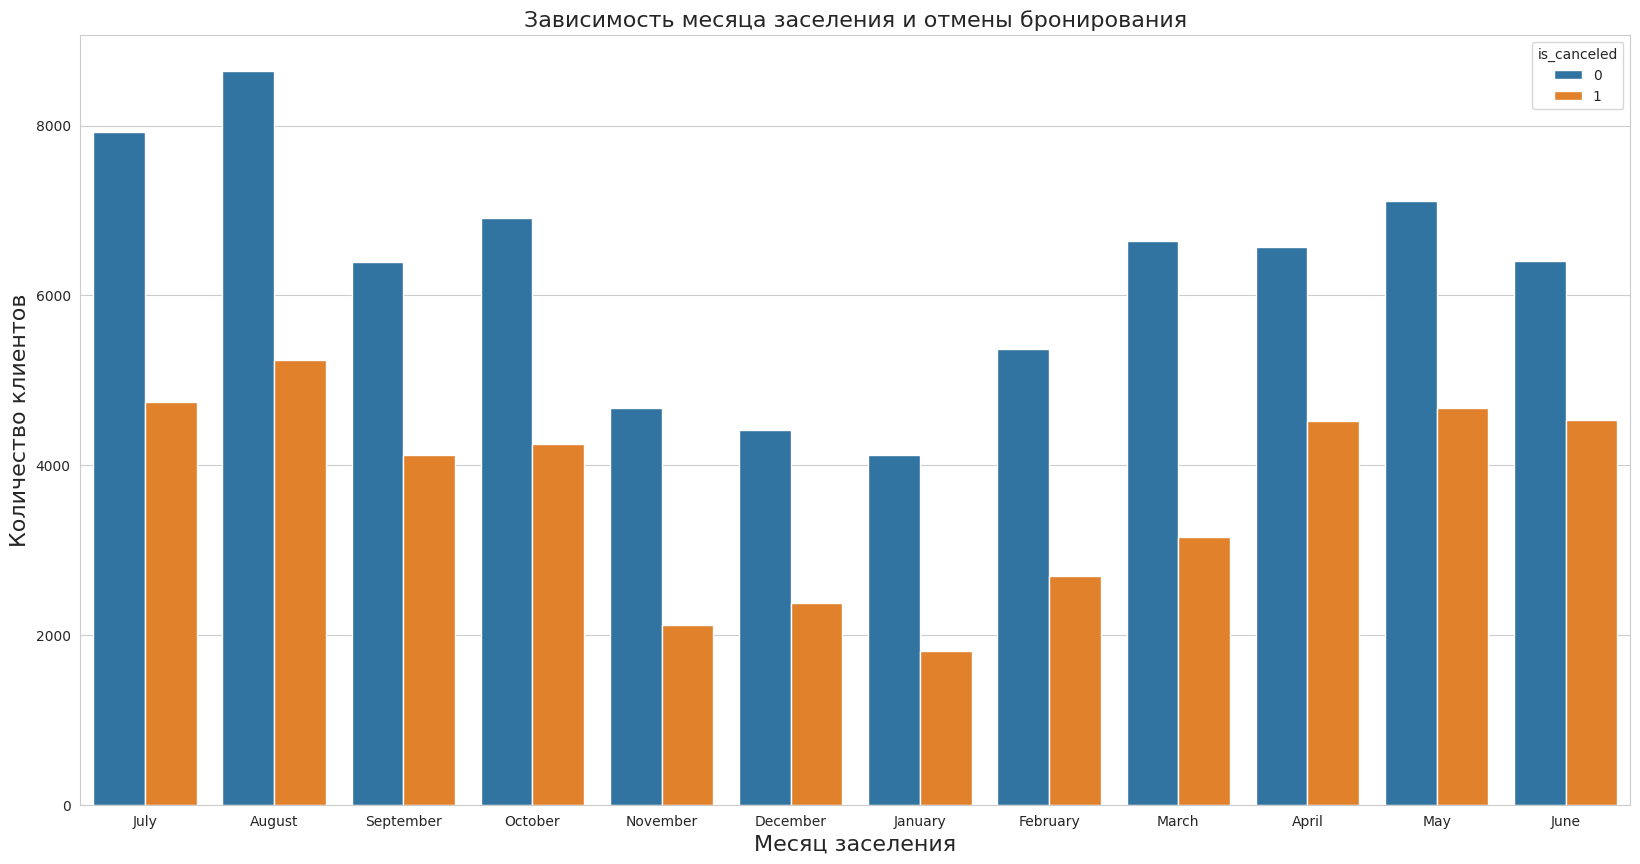

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
# Посмотрим, на сколько влияет месяц заселения на отмену бронирования
sns.countplot(x = 'arrival_date_month', hue = 'is_canceled', data = hotel)
plt.xlabel('Месяц заселения', fontsize = 16)
plt.ylabel('Количество клиентов', fontsize = 16)
plt.title('Зависимость месяца заселения и отмены бронирования', fontsize = 16)

По данному графику можно сделать вывод, что в зависимость между месяцем заселения и отменой бронирования высокая.

Для числовых признаков можно построить гистограмму. Гистограмма - это способ графического представления табличных данных, благодаря которому можно увидеть распределение значений признака.

Для построения гистограммы необходимо вызвать метод hist() у объекта training_data. Желательно указать аргумент figsize, который устанавливает ожидаемый размер изображения. В нашем случае это (15,15).

Заметим, что название переменной, по которой строится гистограмма, указано в названии графика.

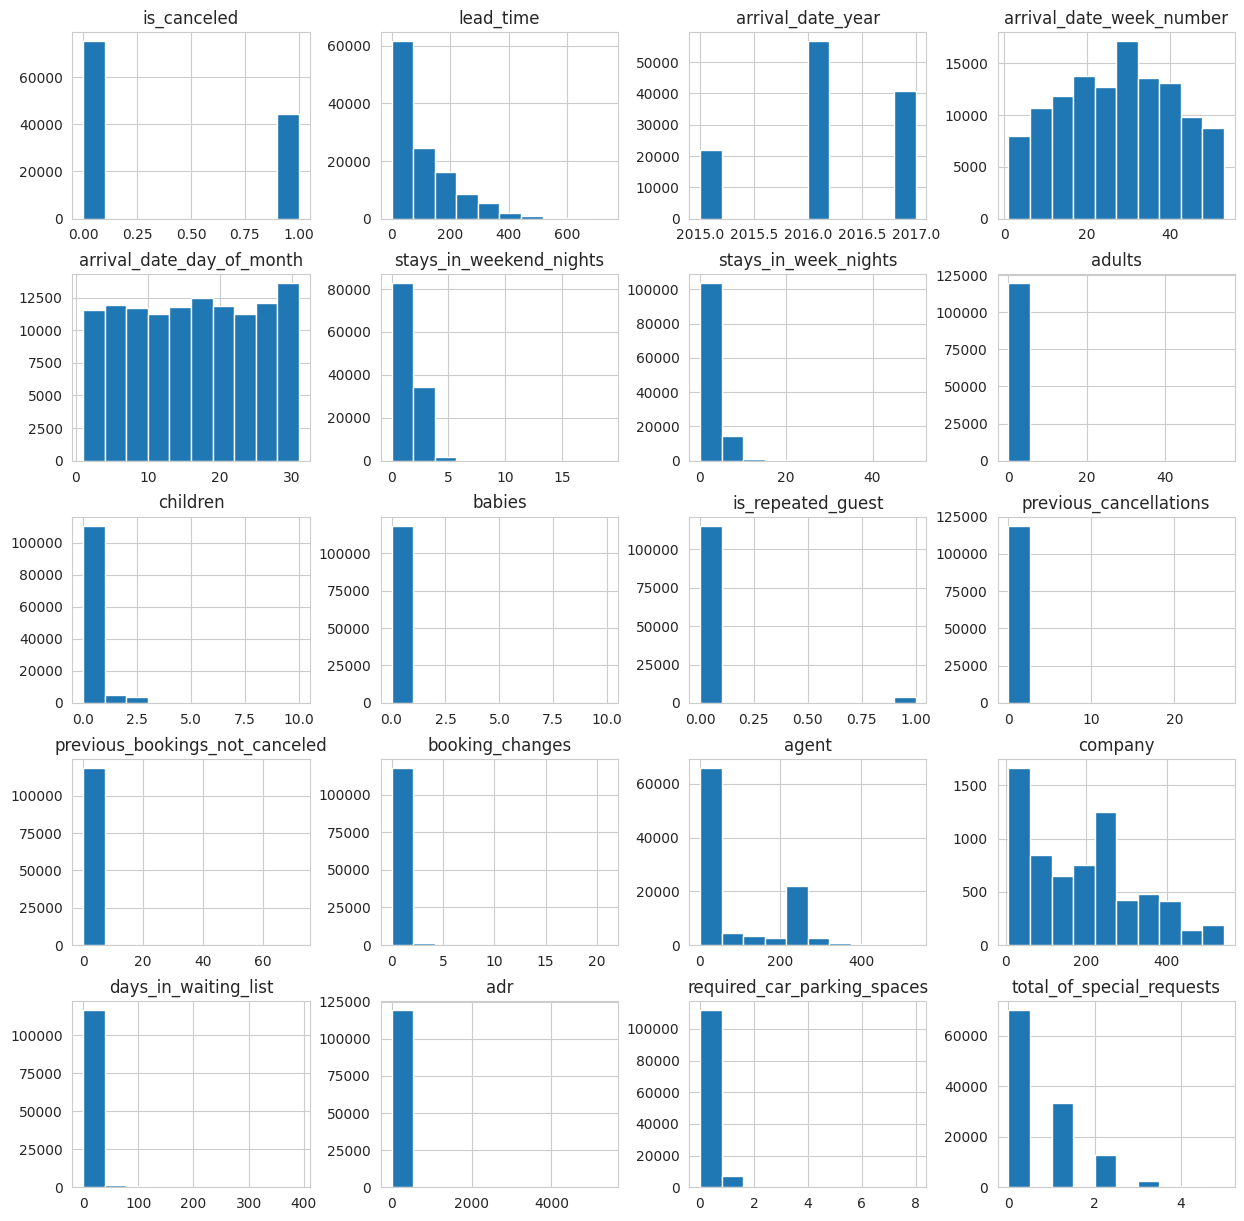

In [ ]:
hotel.hist(figsize=(15, 15));

Из гистограммы видно, что у нас в таких признаках как babies, children, previous_cancellations, previous_bookings_not_canceled, days_in_waiting_list, required_car_parking_spaces, is_repeated_guest нет достаточных данных по различным значениям, то рассматривать их не будем. По признаку 'babies' это уже рассматривалось ранее на функции value_counts.
По признаку 'country' 177 уникальных значений. При кодировании данного категориального признака данные могт исказиться, поэтому также удалим этот столбец. 

  Так как по признаку company пропусков более 50%, то рассматривать его тоже не будем.
  Убираем дублирующие is canceled признаки reservation_status, deposit_type.
  Также признак arrival_date_week_number частично дублирует arrival_date_month.
Такие признаки как reservation_status_date, name, email, phone-number, credit_card и arrival_date_year не повлияют на целевую переменную.

In [ ]:
hotel_data = hotel.drop(['babies', 'children', 'country', 'is_repeated_guest', 'previous_cancellations', 'required_car_parking_spaces', 'name', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'company', 'reservation_status', 'deposit_type', 'arrival_date_week_number', 'reservation_status_date', 'email', 'phone-number', 'credit_card', 'arrival_date_year'], axis=1)
hotel_data.sample(10, random_state=123)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,agent,customer_type,adr,total_of_special_requests
79204,City Hotel,0,3,October,19,1,3,1,BB,Online TA,TA/TO,A,D,0,9.0,Transient,134.25,0
73022,City Hotel,1,115,August,12,2,2,2,BB,Online TA,TA/TO,D,D,0,9.0,Transient,155.00,2
44658,City Hotel,0,80,October,9,0,2,1,HB,Offline TA/TO,TA/TO,D,D,0,12.0,Transient-Party,108.00,0
19217,Resort Hotel,1,92,February,26,1,2,2,Undefined,Groups,TA/TO,A,A,0,134.0,Transient,79.00,0
45223,City Hotel,1,50,October,24,1,1,2,BB,Groups,Direct,A,A,0,NaN,Transient,75.00,0
25614,Resort Hotel,0,39,June,30,1,3,2,BB,Online TA,TA/TO,A,C,0,240.0,Transient,154.25,1
44554,City Hotel,0,92,October,7,0,4,1,BB,Offline TA/TO,TA/TO,A,B,1,3.0,Transient-Party,65.00,0
95429,City Hotel,0,38,August,16,0,3,3,BB,Direct,Direct,G,G,0,14.0,Transient,235.95,1
50709,City Hotel,0,136,May,6,0,2,2,BB,Online TA,TA/TO,A,A,0,9.0,Transient,105.30,1
75147,City Hotel,1,278,July,22,0,2,2,BB,Groups,TA/TO,A,A,0,1.0,Transient-Party,62.00,0


**Посмотрим общую статистику по данным**

Посмотрим на технические параметры загруженных данных для обучения. Для этого вызовем метод describe() для набора данных training_data

Для удобства отображения мы транспонируем результат: меняем местами столбцы и строки.

In [ ]:
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.00,0.000,0.0,21.0
agent,103050.0,86.693382,110.774548,1.00,9.00,14.000,229.0,535.0
adr,119390.0,101.831122,50.535790,-6.38,69.29,94.575,126.0,5400.0
total_of_special_requests,119390.0,0.571363,0.792798,0.00,0.00,0.000,1.0,5.0


Обратим внимание на общие статистики показателей в данных:

count -- количество значений, которые не являются пропущенными (NaN);
mean, std -- среднее и разброс данных в соответствующем поле;
остальные статистики -- минимальное и максимальное значения, и квантили.
Из таких характеристик столбцов мы уже можем извлечь некоторую информацию о данных:

У столбца is_canceled среднее 0.370416. Значит, в нашей выборке у 37% клиентов отмена бронирования.
У столбца agent заполнено только 103050 значений из 119390. У столбца country - 118902 значений из 119390.


In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_date_month         119390 non-null  object 
 4   arrival_date_day_of_month  119390 non-null  int64  
 5   stays_in_weekend_nights    119390 non-null  int64  
 6   stays_in_week_nights       119390 non-null  int64  
 7   adults                     119390 non-null  int64  
 8   meal                       119390 non-null  object 
 9   market_segment             119390 non-null  object 
 10  distribution_channel       119390 non-null  object 
 11  reserved_room_type         119390 non-null  object 
 12  assigned_room_type         119390 non-null  object 
 13  booking_changes            11

Поскольку алгоритмы машинного обучения работают лишь с числовыми признаками, необходимо  категориальные признаки перевести в числовые. Для этого выделим их в отдельный датафрейм.

In [ ]:
categorical_data1 = hotel_data.select_dtypes(include=['object']) # 1-й метод объединения категориальных признаков 
categorical_data1.sample(10, random_state=123)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type
79204,City Hotel,October,BB,Online TA,TA/TO,A,D,Transient
73022,City Hotel,August,BB,Online TA,TA/TO,D,D,Transient
44658,City Hotel,October,HB,Offline TA/TO,TA/TO,D,D,Transient-Party
19217,Resort Hotel,February,Undefined,Groups,TA/TO,A,A,Transient
45223,City Hotel,October,BB,Groups,Direct,A,A,Transient
25614,Resort Hotel,June,BB,Online TA,TA/TO,A,C,Transient
44554,City Hotel,October,BB,Offline TA/TO,TA/TO,A,B,Transient-Party
95429,City Hotel,August,BB,Direct,Direct,G,G,Transient
50709,City Hotel,May,BB,Online TA,TA/TO,A,A,Transient
75147,City Hotel,July,BB,Groups,TA/TO,A,A,Transient-Party


In [ ]:
categorical_data = pd.DataFrame(hotel_data, columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type'])
# посмотрим на первые пять наблюдений
categorical_data.sample(10, random_state=123)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type
79204,City Hotel,October,BB,Online TA,TA/TO,A,D,Transient
73022,City Hotel,August,BB,Online TA,TA/TO,D,D,Transient
44658,City Hotel,October,HB,Offline TA/TO,TA/TO,D,D,Transient-Party
19217,Resort Hotel,February,Undefined,Groups,TA/TO,A,A,Transient
45223,City Hotel,October,BB,Groups,Direct,A,A,Transient
25614,Resort Hotel,June,BB,Online TA,TA/TO,A,C,Transient
44554,City Hotel,October,BB,Offline TA/TO,TA/TO,A,B,Transient-Party
95429,City Hotel,August,BB,Direct,Direct,G,G,Transient
50709,City Hotel,May,BB,Online TA,TA/TO,A,A,Transient
75147,City Hotel,July,BB,Groups,TA/TO,A,A,Transient-Party


In [ ]:
categorical_data.nunique()

hotel                    2
arrival_date_month      12
meal                     5
market_segment           8
distribution_channel     5
reserved_room_type      10
assigned_room_type      12
customer_type            4
dtype: int64

In [ ]:
dummy_features = pd.get_dummies(categorical_data)
dummy_features.sample(10, random_state=123)

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
79204,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
73022,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
44658,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19217,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45223,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25614,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
44554,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95429,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
50709,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75147,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
numeric_data = pd.DataFrame(hotel_data, columns = ['lead_time', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'booking_changes', 'agent', 'adr', 'total_of_special_requests'])
# посмотрим на первые пять наблюдений
numeric_data.sample(10, random_state=123)

,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,booking_changes,agent,adr,total_of_special_requests
79204,3,19,1,3,1,0,9.0,134.25,0
73022,115,12,2,2,2,0,9.0,155.00,2
44658,80,9,0,2,1,0,12.0,108.00,0
19217,92,26,1,2,2,0,134.0,79.00,0
45223,50,24,1,1,2,0,NaN,75.00,0
25614,39,30,1,3,2,0,240.0,154.25,1
44554,92,7,0,4,1,1,3.0,65.00,0
95429,38,16,0,3,3,0,14.0,235.95,1
50709,136,6,0,2,2,0,9.0,105.30,1
75147,278,22,0,2,2,0,1.0,62.00,0


In [ ]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,booking_changes,agent,adr,total_of_special_requests,hotel_City Hotel,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,1,0,0,2,3,NaN,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,737,1,0,0,2,4,NaN,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,1,0,1,1,0,NaN,75.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,1,0,1,1,0,304.0,75.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,1,0,2,2,0,240.0,98.0,1,0,...,0,0,0,0,0,0,0,0,1,0


Выделим целевую переменную в y.

In [ ]:
y = hotel_data['is_canceled']


In [ ]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split
 
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
X_train.head(3)

,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,booking_changes,agent,adr,total_of_special_requests,hotel_City Hotel,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
9710,122,27,0,4,2,3,240.0,74.75,2,0,...,0,0,0,0,0,0,0,0,1,0
40307,20,22,0,2,2,0,1.0,62.00,0,1,...,0,0,0,0,0,0,0,0,0,1
110051,87,16,2,3,3,0,9.0,171.00,0,1,...,0,0,0,0,0,0,0,0,1,0


**Заполнение пропусков**

Рассчитаем средние значения признаков в обучающей выборке, и заполним полученными числами пропуски как в тестовом наборе данных, так и в самой обучающей выборке.

Мы будем заполнять средними значениями из обучающей выборки, так как при решении реальной задачи нам будут доступны только данные для обучения.

In [ ]:
train_mean = X_train.mean()
train_mean

lead_time                        103.913369
arrival_date_day_of_month         15.783339
stays_in_weekend_nights            0.927560
stays_in_week_nights               2.501310
adults                             1.856018
                                    ...    
assigned_room_type_P               0.000108
customer_type_Contract             0.034317
customer_type_Group                0.004942
customer_type_Transient            0.750398
customer_type_Transient-Party      0.210343
Length: 67, dtype: float64

Для заполнения средним значением, передадим на вход методу fillna() полученный ранее набор средних значений для каждого столбца. Опция inplace=True говорит, что мы запишем изменения прямо в существующий массив, а не создадим новый.

In [ ]:
X_train.fillna(train_mean, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83573 entries, 9710 to 15795
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       83573 non-null  int64  
 1   arrival_date_day_of_month       83573 non-null  int64  
 2   stays_in_weekend_nights         83573 non-null  int64  
 3   stays_in_week_nights            83573 non-null  int64  
 4   adults                          83573 non-null  int64  
 5   booking_changes                 83573 non-null  int64  
 6   agent                           83573 non-null  float64
 7   adr                             83573 non-null  float64
 8   total_of_special_requests       83573 non-null  int64  
 9   hotel_City Hotel                83573 non-null  uint8  
 10  hotel_Resort Hotel              83573 non-null  uint8  
 11  arrival_date_month_April        83573 non-null  uint8  
 12  arrival_date_month_August    

In [ ]:
X_test.fillna(train_mean, inplace=True) # заполним пропуски в тестовой выборке 
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35817 entries, 30946 to 46463
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       35817 non-null  int64  
 1   arrival_date_day_of_month       35817 non-null  int64  
 2   stays_in_weekend_nights         35817 non-null  int64  
 3   stays_in_week_nights            35817 non-null  int64  
 4   adults                          35817 non-null  int64  
 5   booking_changes                 35817 non-null  int64  
 6   agent                           35817 non-null  float64
 7   adr                             35817 non-null  float64
 8   total_of_special_requests       35817 non-null  int64  
 9   hotel_City Hotel                35817 non-null  uint8  
 10  hotel_Resort Hotel              35817 non-null  uint8  
 11  arrival_date_month_April        35817 non-null  uint8  
 12  arrival_date_month_August   

**Нормировка данных**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Логистическая регрессия.**
 Для логистической регрессии гиперпараметры как правило не так сильно влияют на результат. Запускаем её с параметрами по умолчанию.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(model, X_train, X_test, y_train, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]
    

    plt.figure(figsize=(12,10))

    print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

    plt.plot([0,1], [0,1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()

Train roc-auc: 0.8124516625672826
Test roc-auc: 0.815468078171057


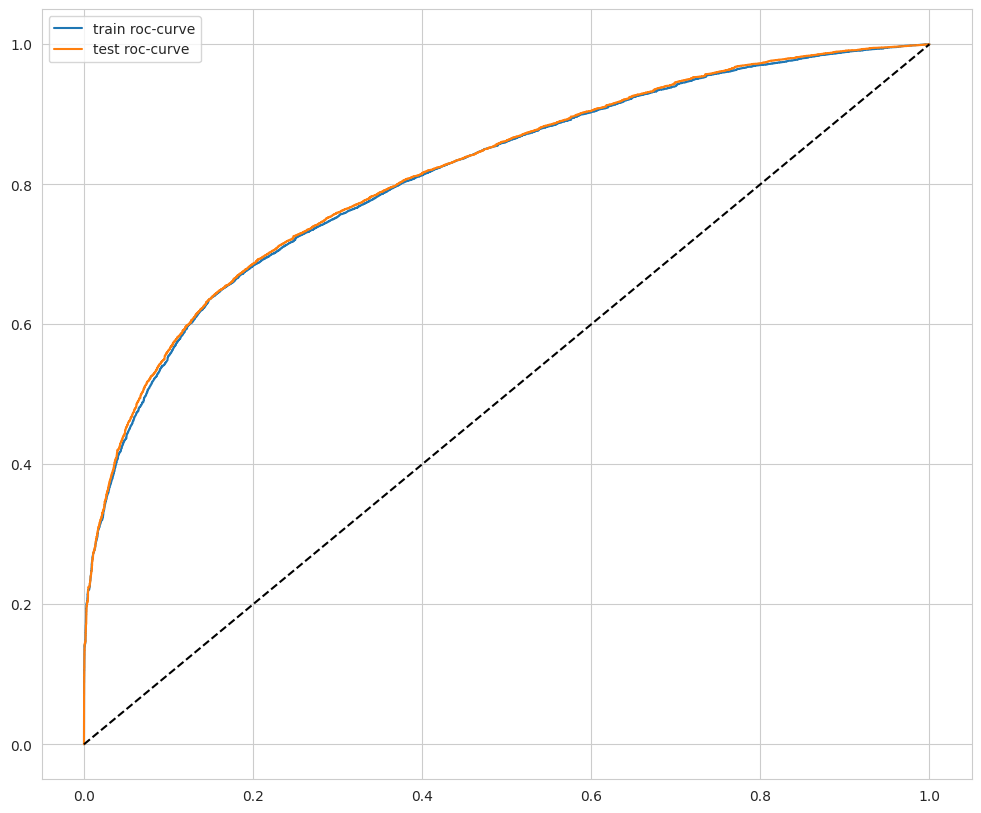

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

In [ ]:
y_test_proba_LR = model.predict_proba(X_test)[:, 1]
LR_auc = roc_auc_score(y_test, y_test_proba_LR)
print('LogisticRegression: ROC AUC=%.3f' % (LR_auc))

LogisticRegression: ROC AUC=0.815


In [ ]:
y_pred_LR = model.predict(X_test)
from sklearn.metrics import confusion_matrix
model_matrix_LR = confusion_matrix(y_test, y_pred_LR, labels = [0, 1])
# для удобства создадим датафрейм
model_matrix_LR_df = pd.DataFrame(model_matrix_LR)
model_matrix_LR_df

,0,1
0,19690,2788
1,5331,8008


In [ ]:
model_matrix_LR_df = pd.DataFrame(model_matrix_LR, columns = ['Прогноз бронь', 'Прогноз отменен'], index = ['Факт бронь', 'Факт отменен'])
model_matrix_LR_df

,Прогноз бронь,Прогноз отменен
Факт бронь,19690,2788
Факт отменен,5331,8008


In [ ]:
from sklearn.metrics import accuracy_score
 
model_accuracy_LR = accuracy_score(y_test, y_pred_LR)
round(model_accuracy_LR, 2)

0.77

Итак, модель логистической регрессии согласно метрики roc-auc предсказывает верный результат в 81% случаев, accuracy - 77%.

**Выбор модели, подбор гиперпараметра.**

Для подбора оптимального гиперпараметра будем использовать перебор параметра по сетке. Качество будем измерять с помощью кросс-валидации.
Напишем функцию, визуализирующую поиск оптимального гиперпараметра модели по сетке. Для этого используем метод GridSearchCV из sklearn.model_selection.

In [ ]:
from sklearn.model_selection import GridSearchCV

def search(X, y, model, param_name, grid, draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        plt.plot(grid, means, label='mean values of score')

        plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
        plt.legend()
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

Протестируем функцию на KNN и решающем дереве.

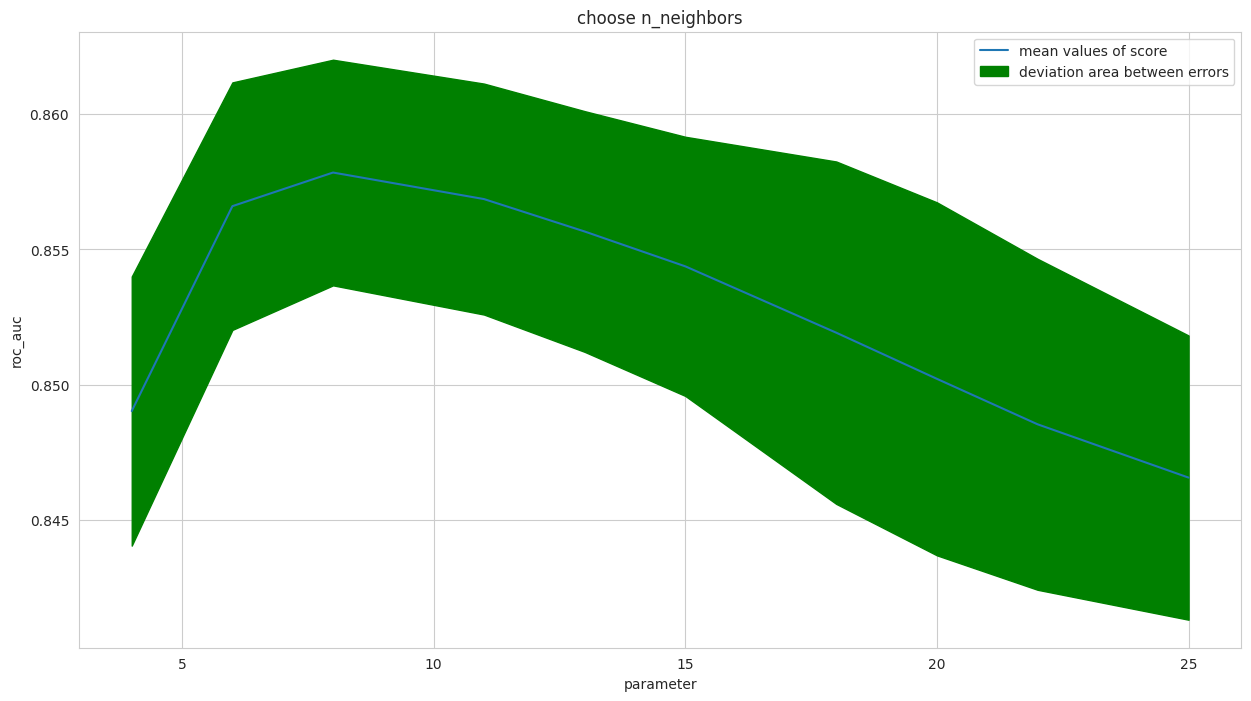

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = [KNeighborsClassifier(n_jobs=-1)]
param_names = ['n_neighbors']
grids = [np.array(np.linspace(4, 25, 10), dtype='int')]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale)

Train roc-auc: 0.9211439126151051
Test roc-auc: 0.8663728049932369


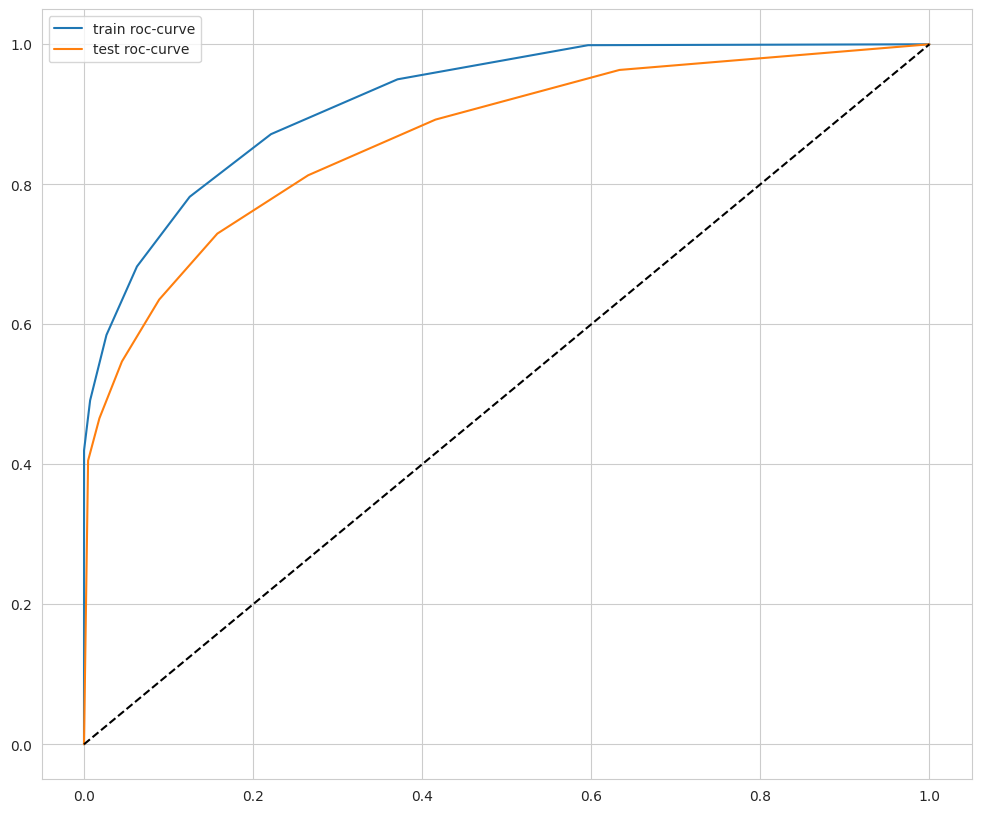

In [ ]:
model = KNeighborsClassifier(n_neighbors=8, n_jobs=-1).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

In [ ]:

y_test_proba_KN = model.predict_proba(X_test)[:, 1]
KN_auc = roc_auc_score(y_test, y_test_proba_KN)
print('KNeighborsClassifier: ROC AUC=%.3f' % (KN_auc))

KNeighborsClassifier: ROC AUC=0.866


In [ ]:
y_pred_KN = model.predict(X_test)
from sklearn.metrics import confusion_matrix
model_matrix_KN = confusion_matrix(y_test, y_pred_KN, labels = [0, 1])
# для удобства создадим датафрейм
model_matrix_KN_df = pd.DataFrame(model_matrix_KN)
model_matrix_KN_df

,0,1
0,20479,1999
1,4865,8474


In [ ]:
model_matrix_KN_df = pd.DataFrame(model_matrix_KN, columns = ['Прогноз бронь', 'Прогноз отменен'], index = ['Факт бронь', 'Факт отменен'])
model_matrix_KN_df

,Прогноз бронь,Прогноз отменен
Факт бронь,20479,1999
Факт отменен,4865,8474


In [ ]:
from sklearn.metrics import accuracy_score
 
model_accuracy_KN = accuracy_score(y_test, y_pred_KN)
round(model_accuracy_KN, 2)

0.81

KNeighbors дает точность 86,6%  по метрике roc-auc, 81% по метрике accuracy, что показывает преимущество этой модели перед логистической регрессией. 


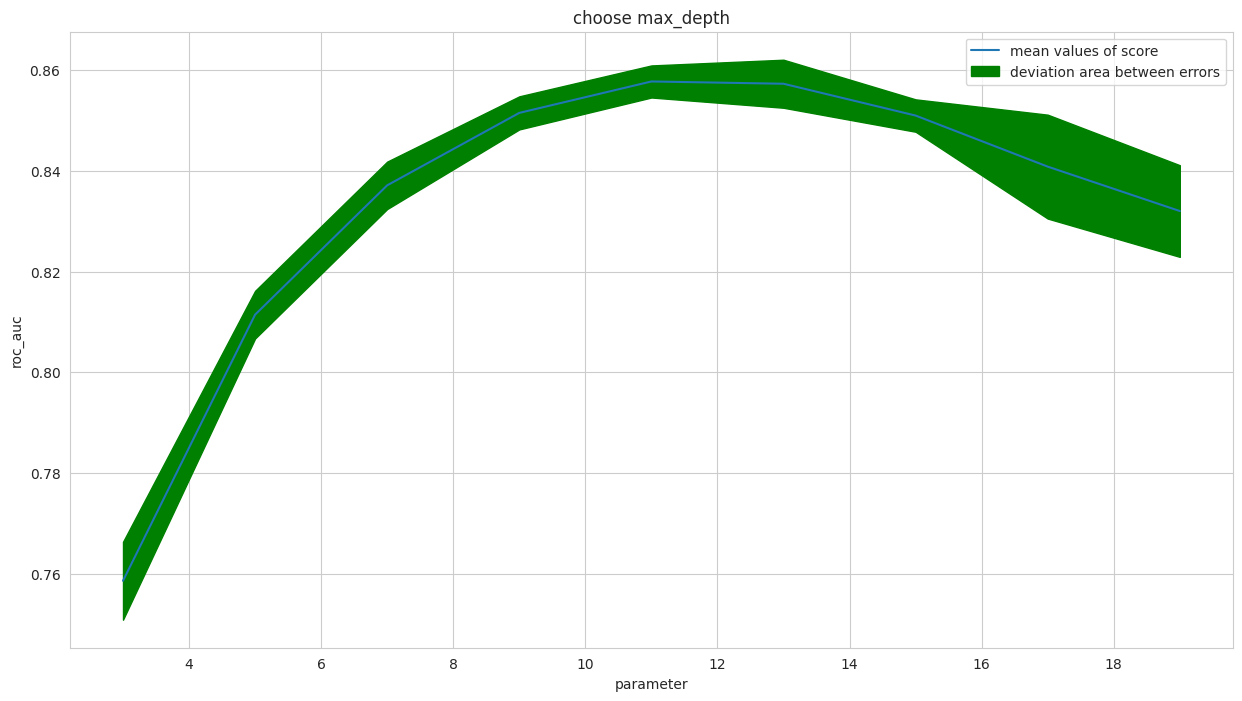

In [ ]:
models = [DecisionTreeClassifier()]
param_names = ['max_depth']
grids = [np.arange(3, 21, 2)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale) 

Train roc-auc: 0.9039787579542479
Test roc-auc: 0.8655512621879006


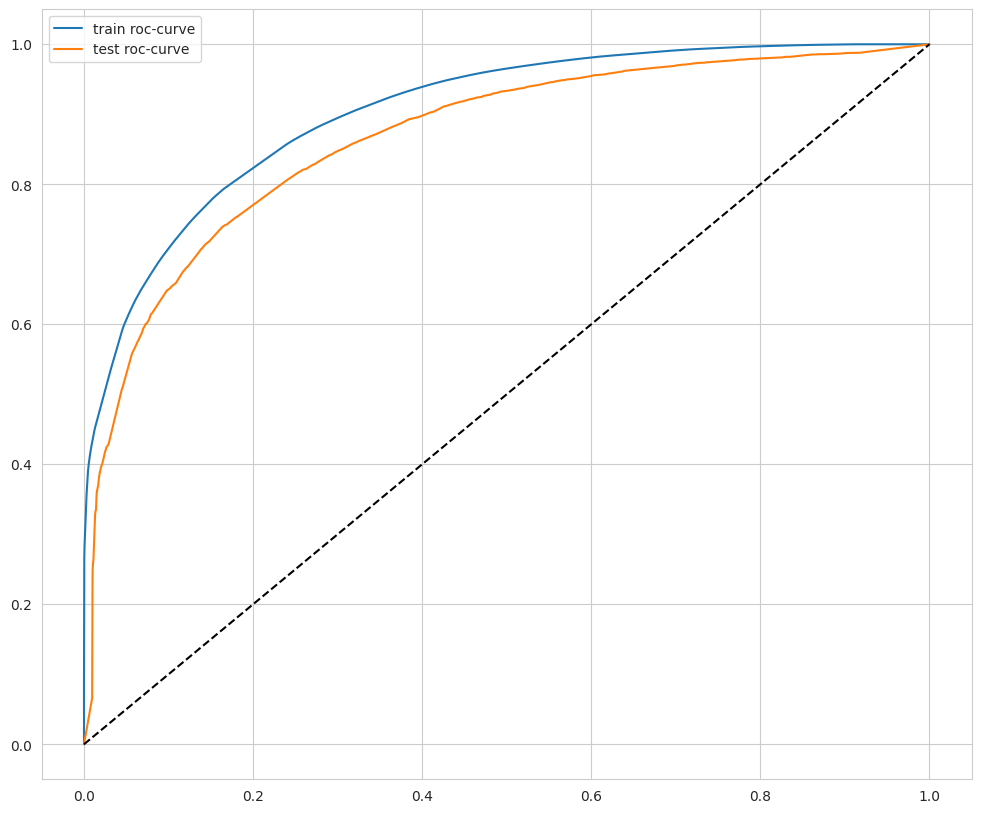

In [ ]:
model = DecisionTreeClassifier(max_depth=12).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

In [ ]:
y_test_proba_DT = model.predict_proba(X_test)[:, 1]
DT_auc = roc_auc_score(y_test, y_test_proba_DT)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (DT_auc))

DecisionTreeClassifier: ROC AUC=0.866


In [ ]:
y_pred_DT = model.predict(X_test)
from sklearn.metrics import confusion_matrix
model_matrix_DT = confusion_matrix(y_test, y_pred_DT, labels = [0, 1])
# для удобства создадим датафрейм
model_matrix_DT_df = pd.DataFrame(model_matrix_DT)
model_matrix_DT_df

,0,1
0,20144,2334
1,4613,8726


In [ ]:
model_matrix_DT_df = pd.DataFrame(model_matrix_DT, columns = ['Прогноз бронь', 'Прогноз отменен'], index = ['Факт бронь', 'Факт отменен'])
model_matrix_DT_df

,Прогноз бронь,Прогноз отменен
Факт бронь,20144,2334
Факт отменен,4613,8726


In [ ]:
from sklearn.metrics import accuracy_score
 
model_accuracy_DT = accuracy_score(y_test, y_pred_DT)
round(model_accuracy_DT, 2)

0.81

Метрика accuaracy показывает одинаковый результат как у решающего дерева, так и у KNN, по  матрице видно, что KNN лучше предсказывает бронь, а решающее дерево - отмену брони.

**Случайный лес.**
 Подберём параметр n_estimators в алгоритме случайный лес. Известно, что случайный лес не переобучается. Поэтому график качества будет монотонно возрастать. Следовательно, необходимо найти минимальное значение n_estimators, при котором качество не изменяется. Поскольку каждое дерево обучается независимо от остальных, достаточно обучить сразу лес из большого количества деревьев, а затем рассмотреть подмножества нужного размера из исходного множества деревьев.

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


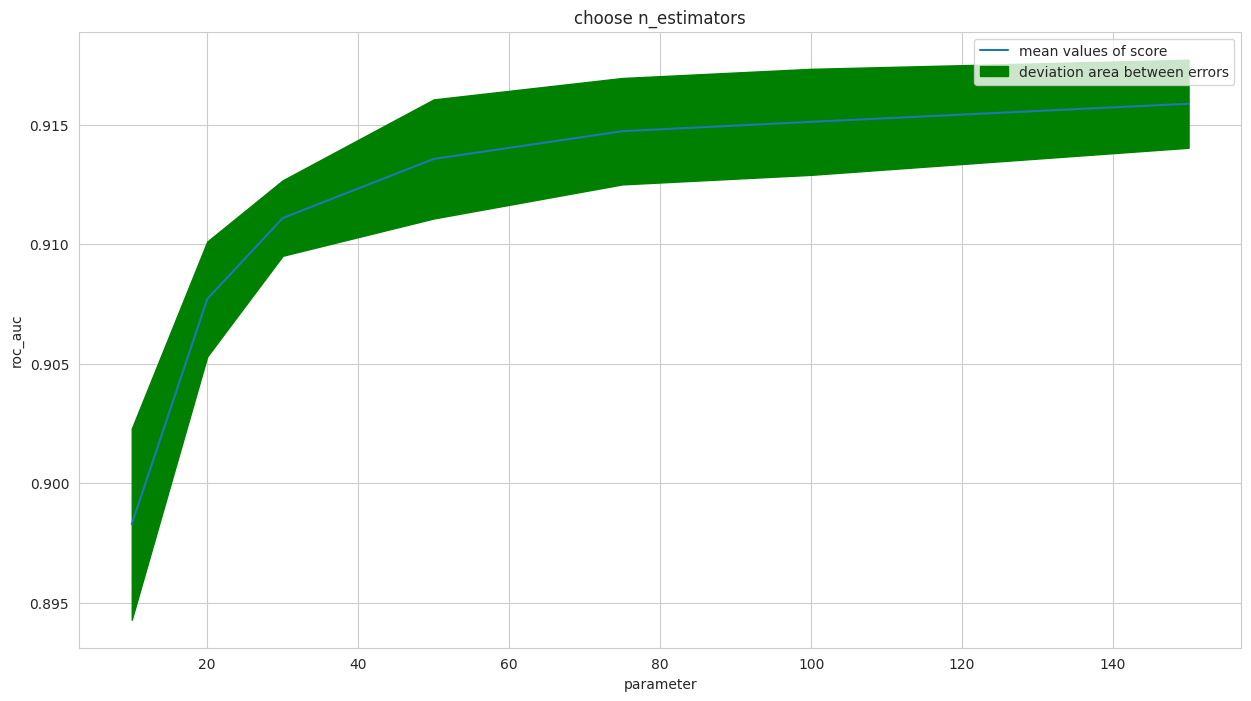

In [ ]:
from sklearn.ensemble import RandomForestClassifier

models = [RandomForestClassifier(n_jobs=-1)]
param_names = ['n_estimators']
grids = [[10, 20, 30, 50, 75, 100, 150]]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale)

Train roc-auc: 0.9988767308080027
Test roc-auc: 0.9231411888847498


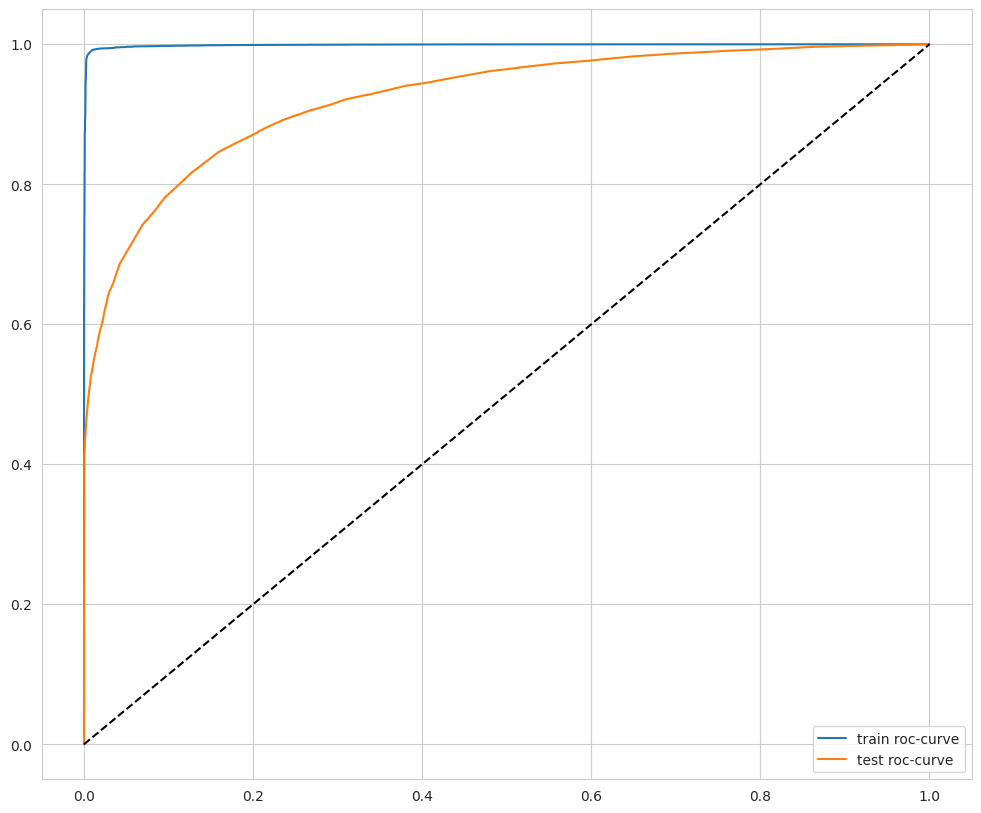

In [ ]:
model = RandomForestClassifier(n_estimators=74, n_jobs=-1).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

In [ ]:
y_test_proba_RF = model.predict_proba(X_test)[:, 1]
RF_auc = roc_auc_score(y_test, y_test_proba_RF)
print('RandomForestClassifier: ROC AUC=%.3f' % (RF_auc))

RandomForestClassifier: ROC AUC=0.923


In [ ]:
y_pred_RF = model.predict(X_test)
from sklearn.metrics import confusion_matrix
model_matrix_RF = confusion_matrix(y_test, y_pred_RF, labels = [0, 1])
# для удобства создадим датафрейм
model_matrix_RF_df = pd.DataFrame(model_matrix_RF)
model_matrix_RF_df

,0,1
0,20926,1552
1,3444,9895


In [ ]:
model_matrix_RF_df = pd.DataFrame(model_matrix_RF, columns = ['Прогноз бронь', 'Прогноз отменен'], index = ['Факт бронь', 'Факт отменен'])
model_matrix_RF_df

,Прогноз бронь,Прогноз отменен
Факт бронь,20926,1552
Факт отменен,3444,9895


In [ ]:
from sklearn.metrics import accuracy_score
 
model_accuracy_RF = accuracy_score(y_test, y_pred_RF)
round(model_accuracy_RF, 2)

0.86

Случайный лес дал самый высокий показатель как по метрике accuracy - 86%, так и по roc-auc - 92%. Также более точные прогнозы видны и по матрице ошибок.

Построим таблицу сравнения эффективности алгоритмов по метрикам roc-auc и accuracy:

In [ ]:
metrics_df = pd.DataFrame([
    [ '81,5', '86,6', '86,6', '92,3'],
     [ '77', '81', '81', '86']],
columns=['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'],
index=['roc-auc', 'accuracy'])
metrics_df.head()

,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier
roc-auc,"81,5","86,6","86,6","92,3"
accuracy,77,81,81,86
